In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

import seaborn as sns 
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import numpy as np 

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet

In [2]:
freedom_df = pd.read_csv('C:\\Anil\\AI And ML\\economic_freedom_index2019_data.csv', encoding='ISO-8859-1')
freedom_df.shape

(186, 34)

In [3]:
freedom_df.head()

CountryID Country Name      WEBNAME                        Region  \
0          1  Afghanistan  Afghanistan                  Asia-Pacific   
1          2      Albania      Albania                        Europe   
2          3      Algeria      Algeria  Middle East and North Africa   
3          4       Angola       Angola            Sub-Saharan Africa   
4          5    Argentina    Argentina                      Americas   

   World Rank  Region Rank  2019 Score  Property Rights  \
0       152.0         39.0        51.5             19.6   
1        52.0         27.0        66.5             54.8   
2       171.0         14.0        46.2             31.6   
3       156.0         33.0        50.6             35.9   
4       148.0         26.0        52.2             47.8   

   Judical Effectiveness  Government Integrity  ...      Country  \
0                   29.6                  25.2  ...  Afghanistan   
1                   30.6                  40.4  ...      Albania   
2                   36.2                  28.9  ...      Algeria   
3                   26.6                  20.5  ...       Angola   
4                   44.5                  33.5  ...    Argentina   

   Population (Millions)  GDP (Billions, PPP)  GDP Growth Rate (%)  \
0                   35.5               $69.6                   2.5   
1                    2.9               $36.0                   3.9   
2                   41.5              $632.9                   2.0   
3                   28.2              $190.3                   0.7   
4                   44.1              $920.2                   2.9   

   5 Year GDP Growth Rate (%)  GDP per Capita (PPP)  Unemployment (%)  \
0                         2.9                $1,958               8.8   
1                         2.5               $12,507              13.9   
2                         3.1               $15,237              10.0   
3                         2.9                $6,753               8.2   
4                         0.7               $20,876               8.7   

   Inflation (%)  FDI Inflow (Millions)  Public Debt (% of GDP)  
0            5.0                   53.9                     7.3  
1            2.0                1,119.1                    71.2  
2            5.6                1,203.0                    25.8  
3           31.7               -2,254.5                    65.3  
4           25.7               11,857.0                    52.6  

[5 rows x 34 columns]

In [4]:
freedom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World Rank                   180 non-null    float64
 5   Region Rank                  180 non-null    float64
 6   2019 Score                   180 non-null    float64
 7   Property Rights              185 non-null    float64
 8   Judical Effectiveness        185 non-null    float64
 9   Government Integrity         185 non-null    float64
 10  Tax Burden                   180 non-null    float64
 11  Gov't Spending               183 non-null    float64
 12  Fiscal Health                183 non-null    float64
 13  Business Freedom    

In [5]:
freedom_df.columns = freedom_df.columns.str.replace(' ', '_')

In [6]:
# Check missing values
def missing_values(df):
    miss_val = df.isnull().sum()
    miss_val_percent = df.isnull().sum() / len(df) * 100
    cols = freedom_df.columns.values
    sort_ = np.argsort(cols)
    indices = pd.Series(sort_[np.searchsorted(cols,cols,sorter=sort_)],
                       index=cols)
    miss_val_table = pd.concat([indices, miss_val, miss_val_percent],
                               axis=1)
    miss_val_df = miss_val_table.rename(
    columns = {0: "Column Index", 1: "Missing Values", 2: "% Missing"})
    return miss_val_df

In [7]:
missing_values(freedom_df)

Column Index  Missing Values  % Missing
CountryID                               0               0   0.000000
Country_Name                            1               0   0.000000
WEBNAME                                 2               0   0.000000
Region                                  3               0   0.000000
World_Rank                              4               6   3.225806
Region_Rank                             5               6   3.225806
2019_Score                              6               6   3.225806
Property_Rights                         7               1   0.537634
Judical_Effectiveness                   8               1   0.537634
Government_Integrity                    9               1   0.537634
Tax_Burden                             10               6   3.225806
Gov't_Spending                         11               3   1.612903
Fiscal_Health                          12               3   1.612903
Business_Freedom                       13               1   0.537634
Labor_Freedom                          14               2   1.075269
Monetary_Freedom                       15               2   1.075269
Trade_Freedom                          16               4   2.150538
Investment_Freedom_                    17               2   1.075269
Financial_Freedom                      18               5   2.688172
Tariff_Rate_(%)                        19               4   2.150538
Income_Tax_Rate_(%)                    20               3   1.612903
Corporate_Tax_Rate_(%)                 21               3   1.612903
Tax_Burden_%_of_GDP                    22               7   3.763441
Gov't_Expenditure_%_of_GDP_            23               4   2.150538
Country                                24               0   0.000000
Population_(Millions)                  25               0   0.000000
GDP_(Billions,_PPP)                    26               1   0.537634
GDP_Growth_Rate_(%)                    27               2   1.075269
5_Year_GDP_Growth_Rate_(%)             28               3   1.612903
GDP_per_Capita_(PPP)                   29               2   1.075269
Unemployment_(%)                       30               5   2.688172
Inflation_(%)                          31               4   2.150538
FDI_Inflow_(Millions)                  32               5   2.688172
Public_Debt_(%_of_GDP)                 33               4   2.150538

In [8]:
na_count = freedom_df.isnull().sum(axis=1)
na_data = na_count[na_count > 0]
pd.concat([freedom_df.loc[na_data.index]['Country_Name'],na_data], 
          axis=1).rename(columns={0: "NA Count"})

Country_Name  NA Count
42            Cuba         1
47        Dominica         1
78            Iraq         9
87        Kiribati         1
88   Korea, North          6
90          Kosovo         1
98           Libya         9
99   Liechtenstein        21
113     Micronesia         2
147     Seychelles         1
153        Somalia        19
161          Syria        16
183          Yemen         9

We can remove above Liechtenstein, Somalia & Syria from the data set as it is not going to impact the results

In [9]:
freedom_df.drop( freedom_df[ freedom_df['Country_Name'] == 'Liechtenstein' ].index, inplace=True)
freedom_df.drop( freedom_df[ freedom_df['Country_Name'] == 'Somalia' ].index, inplace=True)
freedom_df.drop( freedom_df[ freedom_df['Country_Name'] == 'Syria' ].index, inplace=True)

CountryID,	Country Name,	WEBNAME,	Region,	World Rank,	Region Rank, can be eliminated as they will not have any relevant role in forming the clusters so we remove them

In [10]:
cols_to_consider=['2019_Score', 'Property_Rights', 'Judical_Effectiveness',
       'Government_Integrity', 'Tax_Burden',"Gov't_Spending", 'Fiscal_Health', 'Business_Freedom'
        ,'Labor_Freedom', 'Monetary_Freedom', 'Trade_Freedom','Investment_Freedom_'
        ,'Financial_Freedom', 'Tariff_Rate_(%)',
       'Income_Tax_Rate_(%)', 'Corporate_Tax_Rate_(%)', 'Tax_Burden_%_of_GDP',
       "Gov't_Expenditure_%_of_GDP_", 'Population_(Millions)',
       'GDP_(Billions,_PPP)', 'GDP_Growth_Rate_(%)', 'GDP_per_Capita_(PPP)',
       'Unemployment_(%)', 'Inflation_(%)', 'FDI_Inflow_(Millions)',
       'Public_Debt_(%_of_GDP)']

In [11]:
subset_df=freedom_df[cols_to_consider]  #Selecting only the above columns 

In [12]:
#Checking for missing values
subset_df.isna().sum() 

2019_Score                     3
Property_Rights                0
Judical_Effectiveness          0
Government_Integrity           0
Tax_Burden                     3
Gov't_Spending                 0
Fiscal_Health                  0
Business_Freedom               0
Labor_Freedom                  0
Monetary_Freedom               0
Trade_Freedom                  2
Investment_Freedom_            1
Financial_Freedom              3
Tariff_Rate_(%)                2
Income_Tax_Rate_(%)            2
Corporate_Tax_Rate_(%)         2
Tax_Burden_%_of_GDP            4
Gov't_Expenditure_%_of_GDP_    1
Population_(Millions)          0
GDP_(Billions,_PPP)            0
GDP_Growth_Rate_(%)            0
GDP_per_Capita_(PPP)           0
Unemployment_(%)               5
Inflation_(%)                  1
FDI_Inflow_(Millions)          3
Public_Debt_(%_of_GDP)         1
dtype: int64

In [13]:
l_df = len(subset_df)
# Remove missing data
subset_df = subset_df.dropna()

In [14]:
print("%s Percent of Original Data Remaining" 
      %round(len(subset_df) / l_df * 100, 2))

94.54 Percent of Original Data Remaining


In [15]:
subset_df.shape

(173, 26)

In [16]:
subset_df.describe()

2019_Score  Property_Rights  Judical_Effectiveness  \
count  173.000000       173.000000             173.000000   
mean    61.349133        53.561850              46.045087   
std     10.290731        19.229243              17.651070   
min     25.900000         7.600000              12.300000   
25%     54.600000        37.400000              32.300000   
50%     60.800000        52.400000              44.000000   
75%     68.100000        66.000000              56.000000   
max     90.200000        97.400000              92.400000   

       Government_Integrity  Tax_Burden  Gov't_Spending  Fiscal_Health  \
count            173.000000  173.000000      173.000000     173.000000   
mean              42.284393   77.704046       66.019075      66.811561   
std               19.925058   11.786874       20.957233      30.813333   
min                7.900000   42.000000        0.900000       0.000000   
25%               28.100000   71.000000       54.100000      42.500000   
50%               36.400000   78.600000       70.000000      80.300000   
75%               50.500000   85.400000       83.300000      90.100000   
max               96.700000   99.800000       96.600000     100.000000   

       Business_Freedom  Labor_Freedom  Monetary_Freedom  ...  \
count        173.000000     173.000000        173.000000  ...   
mean          64.722543      60.051445         75.682659  ...   
std           14.770800      13.778284          9.501612  ...   
min           17.700000      20.000000          0.000000  ...   
25%           55.800000      51.100000         72.400000  ...   
50%           65.800000      60.100000         77.800000  ...   
75%           75.200000      69.200000         81.800000  ...   
max           96.400000      91.000000         88.000000  ...   

       Investment_Freedom_  Financial_Freedom  Tariff_Rate_(%)  \
count           173.000000         173.000000       173.000000   
mean             58.583815          49.653179         5.623699   
std              21.408001          18.921378         4.408220   
min               0.000000          10.000000         0.000000   
25%              45.000000          40.000000         2.000000   
50%              60.000000          50.000000         4.200000   
75%              75.000000          60.000000         8.700000   
max              95.000000          90.000000        18.600000   

       Income_Tax_Rate_(%)  Corporate_Tax_Rate_(%)  Tax_Burden_%_of_GDP  \
count           173.000000              173.000000           173.000000   
mean             28.604046               23.916763            22.045665   
std              13.235103                8.878332            10.151558   
min               0.000000                0.000000             1.600000   
25%              20.000000               20.000000            14.000000   
50%              30.000000               25.000000            20.700000   
75%              35.000000               30.000000            29.500000   
max              60.000000               50.000000            47.000000   

       Gov't_Expenditure_%_of_GDP_  GDP_Growth_Rate_(%)  Inflation_(%)  \
count                   173.000000           173.000000     173.000000   
mean                     32.023121             3.290751      10.869942   
std                      10.387187             2.748959      82.555305   
min                      10.600000           -14.000000      -0.900000   
25%                      23.600000             2.000000       1.300000   
50%                      31.600000             3.200000       2.800000   
75%                      39.100000             4.800000       5.500000   
max                      57.500000            10.900000    1087.500000   

       Public_Debt_(%_of_GDP)  
count              173.000000  
mean                56.667052  
std                 33.854417  
min                  0.000000  
25%                 35.200000  
50%                 50.400000  
75%                 70.200000  
max       

In [17]:
# Remove Special Characters from the columns and converting str to float
subset_df['GDP_(Billions,_PPP)']=subset_df['GDP_(Billions,_PPP)'].str.replace('$','').astype(str)
subset_df['GDP_(Billions,_PPP)']=subset_df['GDP_(Billions,_PPP)'].str.replace(',','').astype(float)

subset_df['GDP_per_Capita_(PPP)']=subset_df['GDP_per_Capita_(PPP)'].str.replace('$','').astype(str)
subset_df['GDP_per_Capita_(PPP)']=subset_df['GDP_per_Capita_(PPP)'].str.replace(',','').astype(float)

In [18]:

subset_df['FDI_Inflow_(Millions)']=subset_df['FDI_Inflow_(Millions)'].str.replace(',','').astype(float)

In [20]:
subset_df.head()

2019_Score  Property_Rights  Judical_Effectiveness  Government_Integrity  \
0        51.5             19.6                   29.6                  25.2   
1        66.5             54.8                   30.6                  40.4   
2        46.2             31.6                   36.2                  28.9   
3        50.6             35.9                   26.6                  20.5   
4        52.2             47.8                   44.5                  33.5   

   Tax_Burden  Gov't_Spending  Fiscal_Health  Business_Freedom  Labor_Freedom  \
0        91.7            80.3           99.3              49.2           60.4   
1        86.3            73.9           80.6              69.3           52.7   
2        76.4            48.7           18.7              61.6           49.9   
3        83.9            80.7           58.2              55.7           58.8   
4        69.3            49.5           33.0              56.4           46.9   

   Monetary_Freedom  ...  Tax_Burden_%_of_GDP  Gov't_Expenditure_%_of_GDP_  \
0              76.7  ...                  5.0                         25.6   
1              81.5  ...                 24.9                         29.5   
2              74.9  ...                 24.5                         41.4   
3              55.4  ...                 20.6                         25.3   
4              60.2  ...                 30.8                         41.0   

   Population_(Millions)  GDP_(Billions,_PPP)  GDP_Growth_Rate_(%)  \
0                   35.5                 69.6                  2.5   
1                    2.9                 36.0                  3.9   
2                   41.5                632.9                  2.0   
3                   28.2                190.3                  0.7   
4                   44.1                920.2                  2.9   

   GDP_per_Capita_(PPP)  Unemployment_(%)  Inflation_(%)  \
0                1958.0               8.8            5.0   
1               12507.0              13.9            2.0   
2               15237.0              10.0            5.6   
3                6753.0               8.2           31.7   
4               20876.0               8.7           25.7   

  FDI_Inflow_(Millions)  Public_Debt_(%_of_GDP)  
0                  53.9                     7.3  
1                1119.1                    71.2  
2                1203.0                    25.8  
3               -2254.5                    65.3  
4               11857.0                    52.6  

[5 rows x 26 columns]

In [21]:
#Check for missing values
subset_df.isnull().sum()

2019_Score                     0
Property_Rights                0
Judical_Effectiveness          0
Government_Integrity           0
Tax_Burden                     0
Gov't_Spending                 0
Fiscal_Health                  0
Business_Freedom               0
Labor_Freedom                  0
Monetary_Freedom               0
Trade_Freedom                  0
Investment_Freedom_            0
Financial_Freedom              0
Tariff_Rate_(%)                0
Income_Tax_Rate_(%)            0
Corporate_Tax_Rate_(%)         0
Tax_Burden_%_of_GDP            0
Gov't_Expenditure_%_of_GDP_    0
Population_(Millions)          0
GDP_(Billions,_PPP)            0
GDP_Growth_Rate_(%)            0
GDP_per_Capita_(PPP)           0
Unemployment_(%)               0
Inflation_(%)                  0
FDI_Inflow_(Millions)          0
Public_Debt_(%_of_GDP)         0
dtype: int64

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


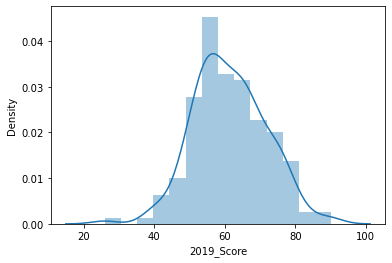

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


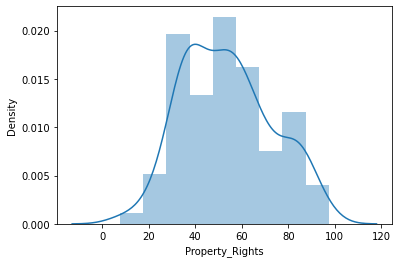

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


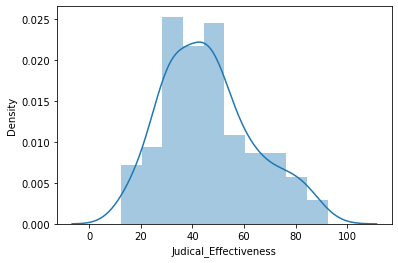

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


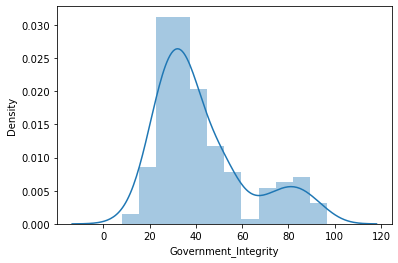

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


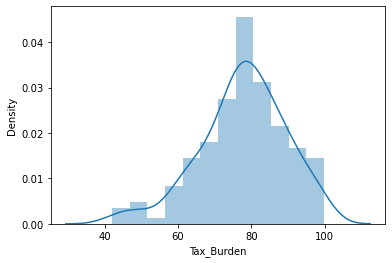

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


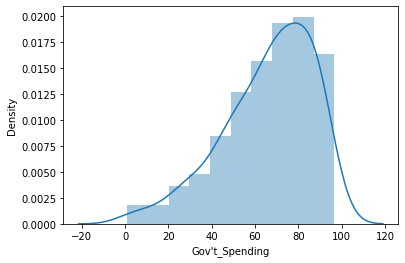

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


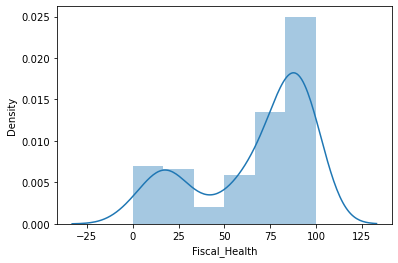

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


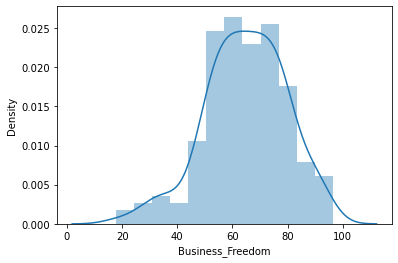

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


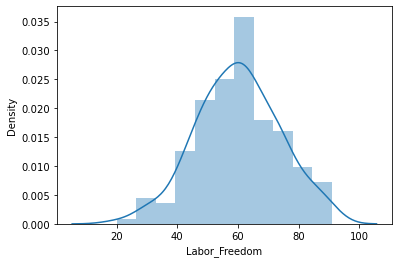

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


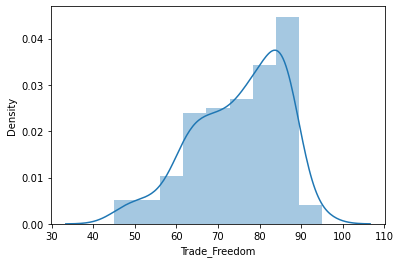

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


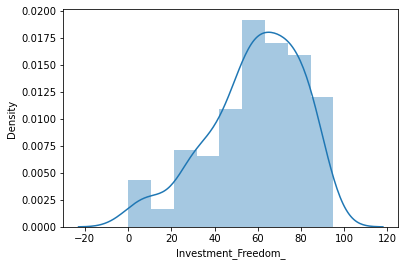

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


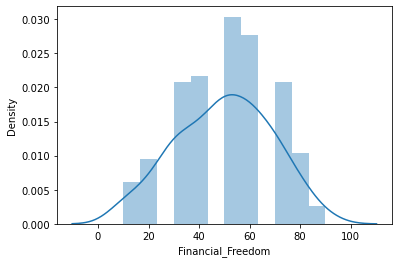

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


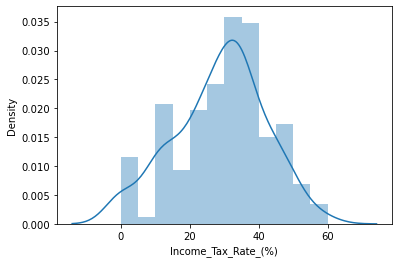

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


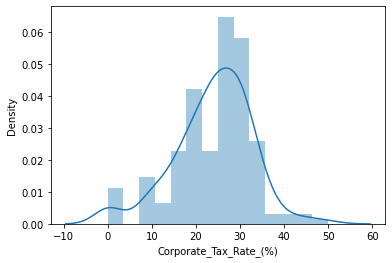

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


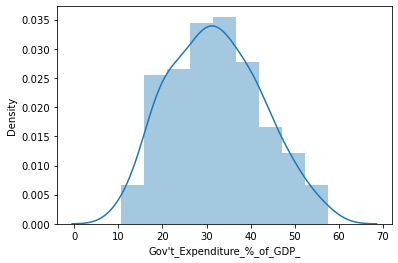

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


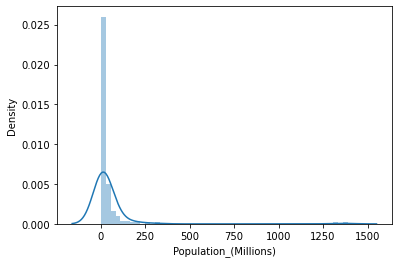

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


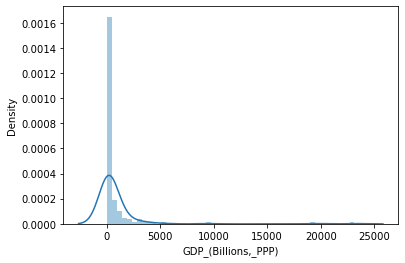

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


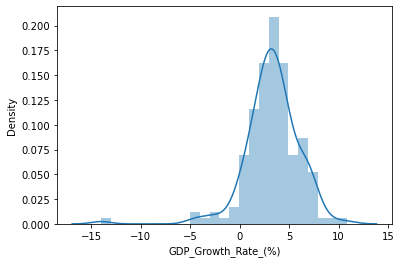

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


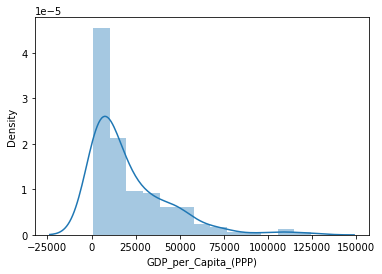

C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\anil.devireddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


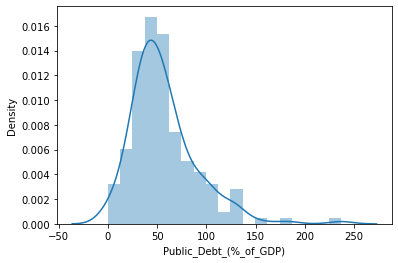

In [135]:
#Univariate analysis
for i in subset_df.columns:
    sns.distplot(subset_df[i])
    plt.show()

In [107]:
#Bivariate Analysis
sns.pairplot(subset_df , diag_kind = 'kde')
plt.show()

In [22]:
for i, name in enumerate(subset_df.columns):
    print(i, name)

0 2019_Score
1 Property_Rights
2 Judical_Effectiveness
3 Government_Integrity
4 Tax_Burden
5 Gov't_Spending
6 Fiscal_Health
7 Business_Freedom
8 Labor_Freedom
9 Monetary_Freedom
10 Trade_Freedom
11 Investment_Freedom_
12 Financial_Freedom
13 Tariff_Rate_(%)
14 Income_Tax_Rate_(%)
15 Corporate_Tax_Rate_(%)
16 Tax_Burden_%_of_GDP
17 Gov't_Expenditure_%_of_GDP_
18 Population_(Millions)
19 GDP_(Billions,_PPP)
20 GDP_Growth_Rate_(%)
21 GDP_per_Capita_(PPP)
22 Unemployment_(%)
23 Inflation_(%)
24 FDI_Inflow_(Millions)
25 Public_Debt_(%_of_GDP)


In [35]:
subset_df.isna().sum() 

2019_Score                     0
Property_Rights                0
Judical_Effectiveness          0
Government_Integrity           0
Tax_Burden                     0
Gov't_Spending                 0
Fiscal_Health                  0
Business_Freedom               0
Labor_Freedom                  0
Monetary_Freedom               0
Trade_Freedom                  0
Investment_Freedom_            0
Financial_Freedom              0
Tariff_Rate_(%)                0
Income_Tax_Rate_(%)            0
Corporate_Tax_Rate_(%)         0
Tax_Burden_%_of_GDP            0
Gov't_Expenditure_%_of_GDP_    0
Population_(Millions)          0
GDP_(Billions,_PPP)            0
GDP_Growth_Rate_(%)            0
GDP_per_Capita_(PPP)           0
Unemployment_(%)               0
Inflation_(%)                  0
FDI_Inflow_(Millions)          0
Public_Debt_(%_of_GDP)         0
dtype: int64

In [74]:
scaler=StandardScaler()
subset_scaled=scaler.fit_transform(subset_df)   

In [76]:
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset_df.columns)   #Creating a dataframe of the above results

In [77]:
#Identify the correlation between feature
sns.heatmap(subset_scaled_df.corr(),annot=True)
plt.show()

we are looking to predict Freedom Score, so select 2019 Score as our y-variable and define X as the remaining values.

In [41]:
X = subset_df.drop('2019_Score', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = subset_df[['2019_Score']]

In [ ]:
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression(normalize=True)
lm.fit(X,y)
lm.score(X,y)

0.9999927760468311

According to the coefficient of determination, the model explains ~99% of the variation in the data.

Minimize the number of principal components so that we can get the 95% of variance

In [79]:
cols_to_consider1=['2019_Score', 'Property_Rights', 'Fiscal_Health', 'Business_Freedom'
        ,'Labor_Freedom', 'Monetary_Freedom', 'Trade_Freedom','Investment_Freedom_'
        ,'Financial_Freedom', 'Income_Tax_Rate_(%)', 'Tax_Burden_%_of_GDP',
       "Gov't_Expenditure_%_of_GDP_", 
       'GDP_(Billions,_PPP)', 'GDP_Growth_Rate_(%)', 
       'FDI_Inflow_(Millions)',
       'Public_Debt_(%_of_GDP)']

In [80]:
subset_df1=subset_df[cols_to_consider1]  #Selecting only the above columns 

In [81]:
X = subset_df1.drop('2019_Score', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = subset_df1[['2019_Score']]

In [82]:
lm = LinearRegression(normalize=True)
lm.fit(X,y)
lm.score(X,y)

0.9815666568438304

In [83]:
scaler=StandardScaler()
subset_scaled=scaler.fit_transform(subset_df1)   

In [84]:
subset_scaled_df1=pd.DataFrame(subset_scaled,columns=subset_df1.columns)   #Creating a dataframe of the above results

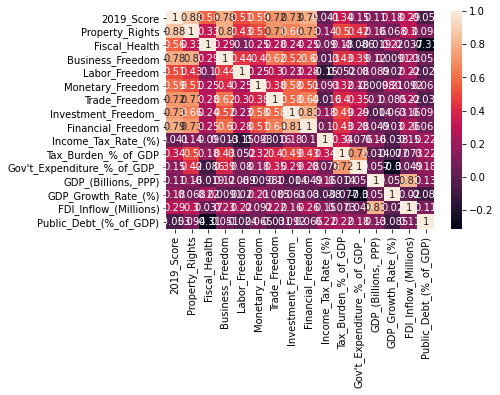

In [85]:
sns.heatmap(subset_scaled_df1.corr(),annot=True)
plt.show()

In [131]:
cols_to_consider2=['2019_Score', 'Property_Rights', 'Fiscal_Health', 'Business_Freedom'
        ,'Labor_Freedom', 'Monetary_Freedom', 'Trade_Freedom','Investment_Freedom_'
        ,'Financial_Freedom']

In [132]:
subset_df2=subset_df[cols_to_consider2]  #Selecting only the above columns 

In [133]:
X = subset_df2.drop('2019_Score', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = subset_df2[['2019_Score']]

In [134]:
lm = LinearRegression(normalize=True)
lm.fit(X,y)
lm.score(X,y)

0.9491920166381992

In [135]:
scaler=StandardScaler()
subset_scaled=scaler.fit_transform(subset_df2)   

In [136]:
subset_scaled_df2=pd.DataFrame(subset_scaled,columns=subset_df2.columns)   #Creating a dataframe of the above results

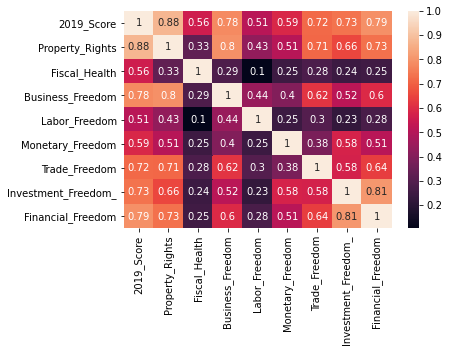

In [137]:
sns.heatmap(subset_scaled_df2.corr(),annot=True)
plt.show()

In [189]:
 subset_scaled_df2.drop('2019_Score', axis=1, inplace=True)

1 2.6376796271077896
2 2.0779308877586593
3 1.958997063987088
4 1.832788077332468
5 1.7590807688748293
6 1.700942489593267
7 1.6276267114554284
8 1.5848344056316839
9 1.542974338949283


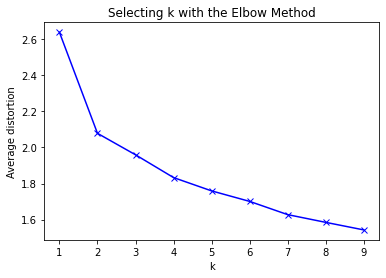

In [191]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df2)
    prediction=model.predict(subset_scaled_df2)
    distortion=sum(np.min(cdist(subset_scaled_df2, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df2.shape[0]
                           
    meanDistortions.append(distortion)

    print(k,distortion)
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

Looking at the elbow method we can take K=6, so let's apply Kmeans with k=6

In [192]:
kmeans = KMeans(n_clusters=6, n_init = 15, random_state=2345)
kmeans.fit(subset_scaled_df2)

KMeans(n_clusters=6, n_init=15, random_state=2345)

In [193]:
centroids = kmeans.cluster_centers_
centroids

array([[ 2.97587899e-02,  5.93135223e-01, -4.86919899e-02,
        -4.46378325e-01,  3.14774229e-01,  5.89300209e-01,
         4.84169635e-01,  4.62467708e-01],
       [-6.52063216e-01, -1.35409621e+00, -5.30765389e-01,
        -5.26249118e-01, -2.71175366e-01, -7.38695207e-01,
        -3.83134765e-01, -4.40027466e-01],
       [ 1.48140595e+00,  6.24818324e-01,  1.19851203e+00,
         5.52776632e-01,  7.00275105e-01,  1.05241035e+00,
         1.06351812e+00,  1.19960776e+00],
       [-2.39714414e+00, -1.60172254e+00, -2.09277863e+00,
        -2.33298154e+00, -7.98836545e+00, -1.39167636e+00,
        -2.74448178e+00, -2.10176461e+00],
       [ 2.50843990e-01, -2.17050885e-01,  4.48533861e-01,
         9.95799575e-01,  1.33014931e-01,  6.70601458e-02,
         9.98063710e-02, -5.47106573e-04],
       [-9.55726629e-01,  3.99030360e-01, -8.84976219e-01,
        -2.54553523e-01, -6.24538264e-01, -9.08364433e-01,
        -1.17175774e+00, -1.16284220e+00]])

In [194]:
centroid_df = pd.DataFrame(centroids, columns = subset_scaled_df2.columns )

In [195]:
centroid_df

Property_Rights  Fiscal_Health  Business_Freedom  Labor_Freedom  \
0         0.029759       0.593135         -0.048692      -0.446378   
1        -0.652063      -1.354096         -0.530765      -0.526249   
2         1.481406       0.624818          1.198512       0.552777   
3        -2.397144      -1.601723         -2.092779      -2.332982   
4         0.250844      -0.217051          0.448534       0.995800   
5        -0.955727       0.399030         -0.884976      -0.254554   

   Monetary_Freedom  Trade_Freedom  Investment_Freedom_  Financial_Freedom  
0          0.314774       0.589300             0.484170           0.462468  
1         -0.271175      -0.738695            -0.383135          -0.440027  
2          0.700275       1.052410             1.063518           1.199608  
3         -7.988365      -1.391676            -2.744482          -2.101765  
4          0.133015       0.067060             0.099806          -0.000547  
5         -0.624538      -0.908364            -1.171758          -1.162842

The above are the centroids for the different clusters

In [196]:
dataset=subset_scaled_df2[:]  

In [197]:
dataset['KmeansLabel']=kmeans.labels_

<ipython-input-197-2f5e4caa51de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['KmeansLabel']=kmeans.labels_


In [198]:
dataset.head(10)

Property_Rights  Fiscal_Health  Business_Freedom  Labor_Freedom  \
0        -1.771283       1.057424         -1.053944       0.025371   
1         0.064576       0.448782          0.310799      -0.535102   
2        -1.145422      -1.565920         -0.212013      -0.738910   
3        -0.921155      -0.280286         -0.612610      -0.091091   
4        -0.300510      -1.100488         -0.565081      -0.957276   
5         0.189748      -0.449534          0.921878       0.826046   
6         1.331944       0.631049          1.600854       1.750462   
7         1.597935       0.608265          0.691026       0.629517   
8         0.288843       0.735201          0.324378       0.280131   
9        -0.592578      -0.036179          0.256480       0.542170   

   Monetary_Freedom  Trade_Freedom  Investment_Freedom_  Financial_Freedom  \
0          0.107381      -0.835841            -2.276011          -2.101765   
1          0.614025       1.183693             0.534815           1.078456   
2         -0.082610      -0.706146            -1.339069          -1.041691   
3         -2.140851      -1.280509            -1.339069          -0.511654   
4         -1.634207      -0.465284            -0.167891           0.548420   
5          0.223487       0.535219             0.769051           1.078456   
6          1.152334       1.165165             1.003286           2.138530   
7          0.614025       1.016943             1.471757           1.078456   
8         -1.338665      -0.039144             0.066344           0.548420   
9          0.255152      -2.521875            -0.402127           0.548420   

   KmeansLabel  
0            5  
1            0  
2            1  
3            5  
4            1  
5            4  
6            2  
7            2  
8            4  
9            1

In [199]:
plt.scatter(dataset['Property_Rights'], dataset['Financial_Freedom'], c=kmeans.labels_,)  
plt.show()

In [204]:
plt.scatter(dataset['Trade_Freedom'], dataset['Investment_Freedom_'], c=kmeans.labels_,)  
plt.show()

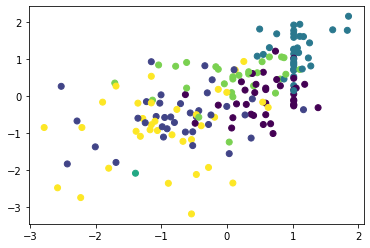

In [205]:
plt.scatter(dataset['Trade_Freedom'], dataset['Business_Freedom'], c=kmeans.labels_,)  
plt.show()

In [ ]:
#Hierarchial Clustering

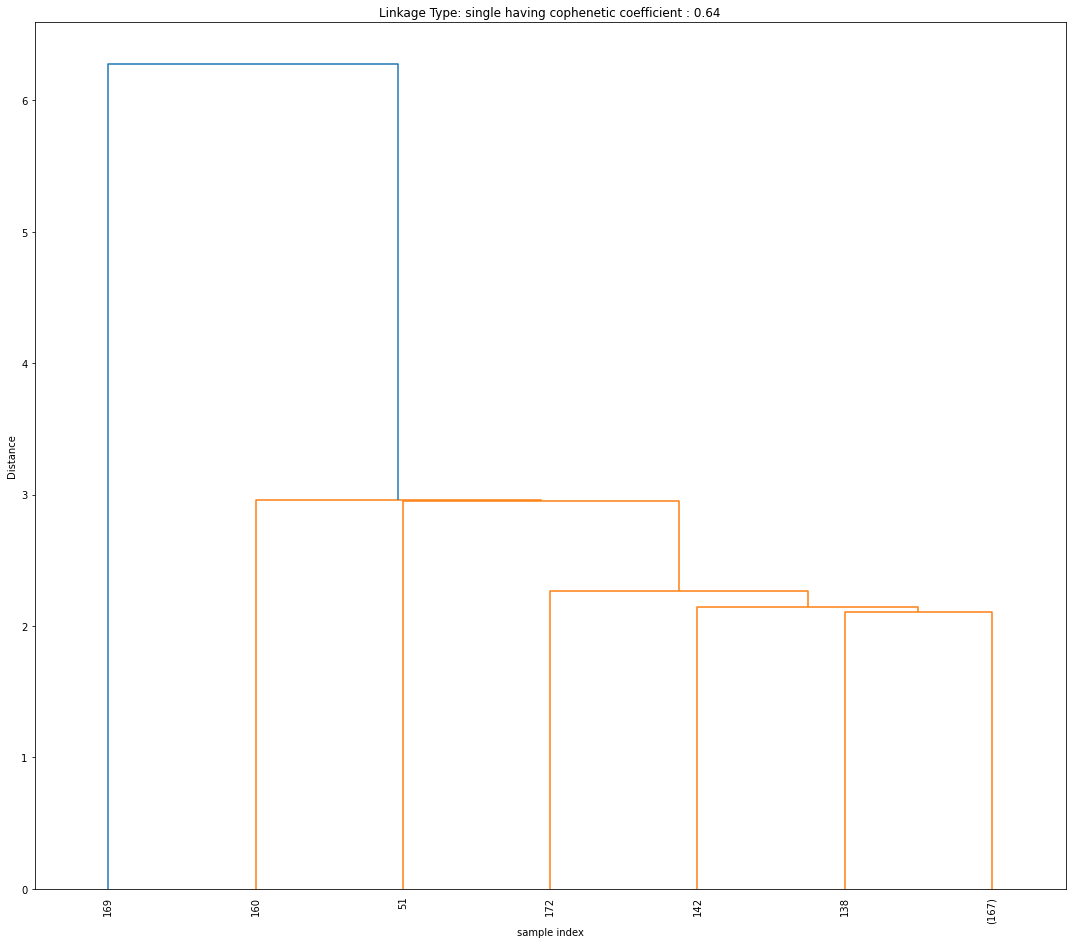

single 0.640253242243292


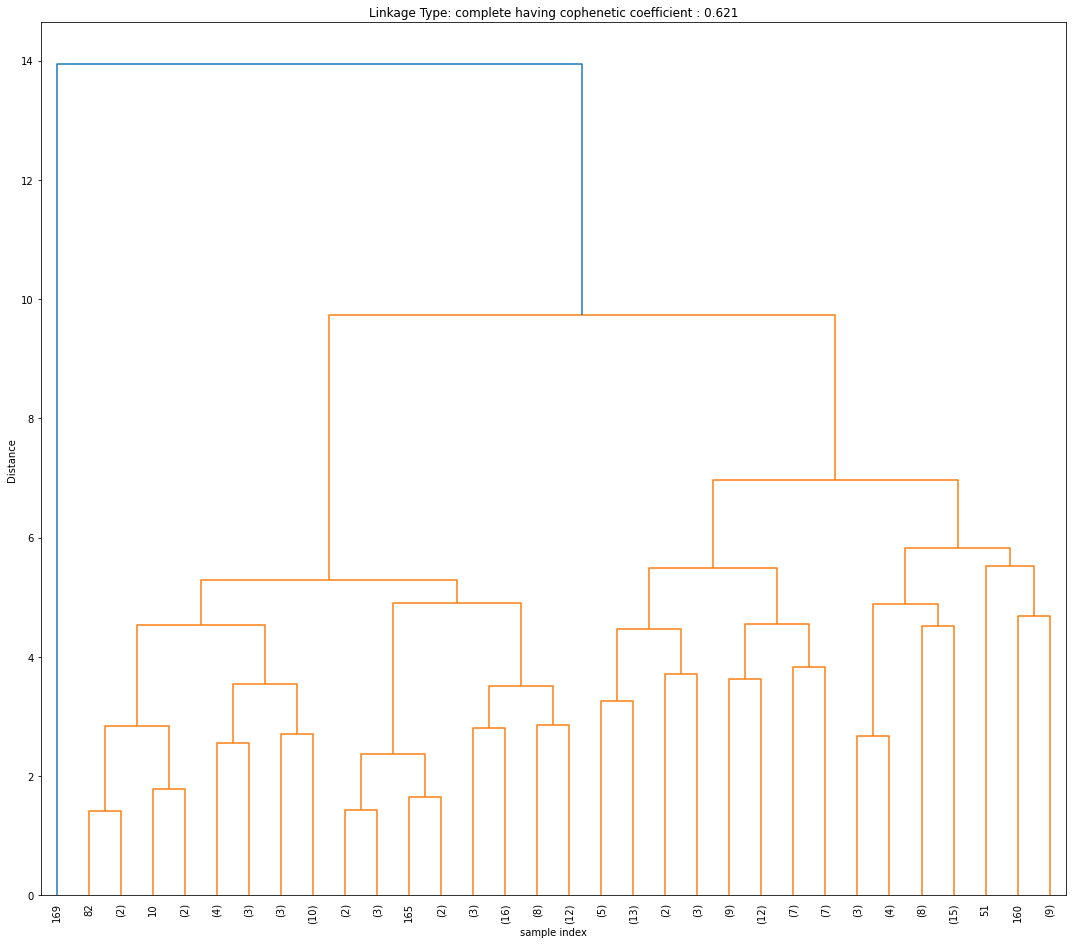

complete 0.6209212797798624


average 0.7345934558949965


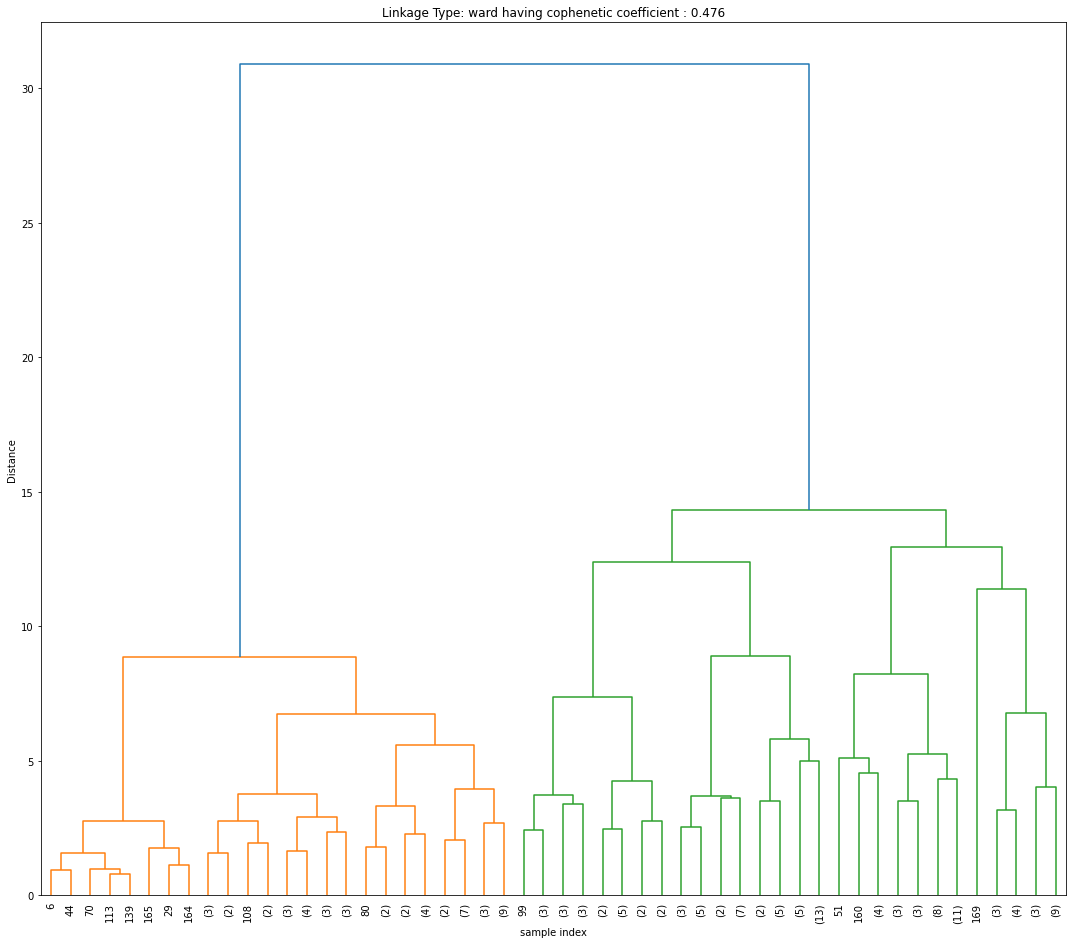

ward 0.4760173531768205


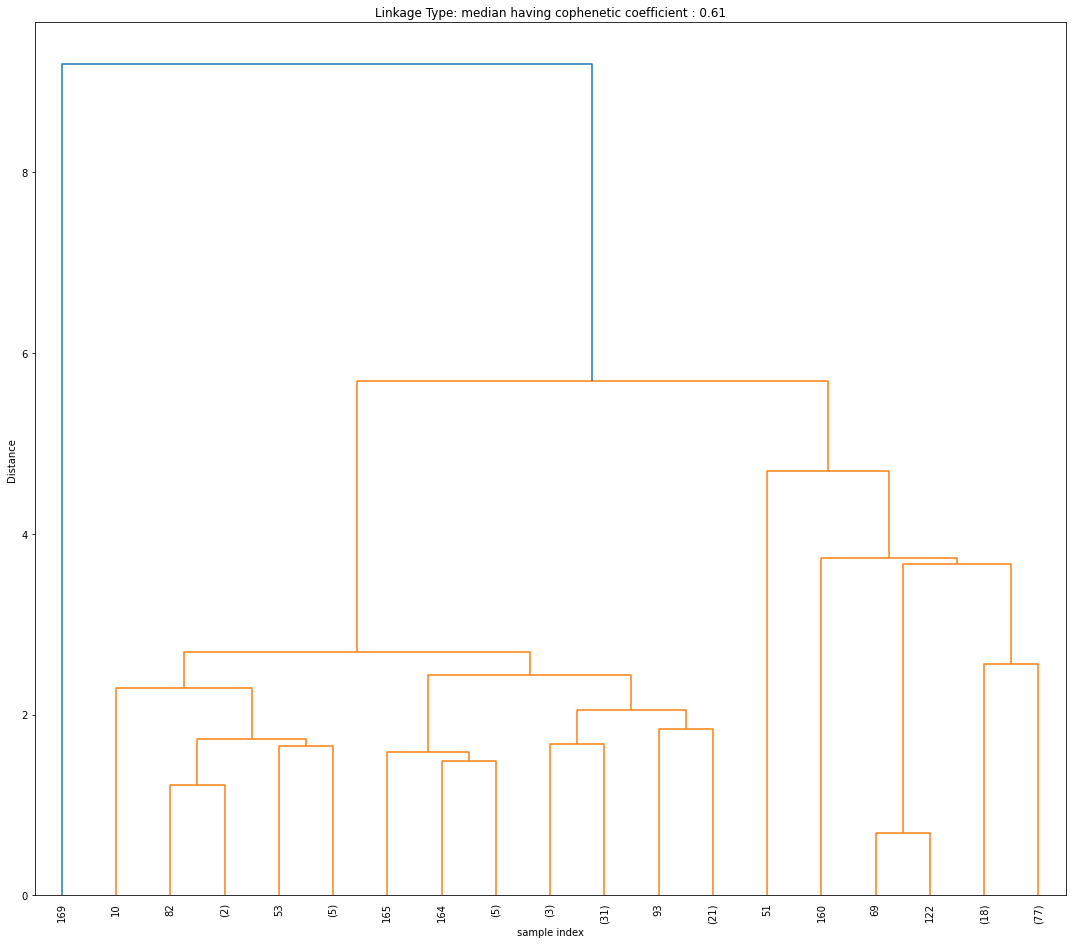

median 0.6100529126421079


In [206]:
linkage_methods=['single','complete','average','ward','median']
results_cophenetic_coef=[]
for i in linkage_methods :
    plt.figure(figsize=(15, 13))
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    Z = linkage(subset_scaled_df2, i)
    cc,cophn_dist=cophenet(Z,pdist(subset_scaled_df2))
    dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level')
    plt.tight_layout()
    plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    plt.show()
    results_cophenetic_coef.append((i,cc))
    print (i,cc)

In [207]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

LinkageMethod  CopheneticCoefficient
0        single               0.640253
1      complete               0.620921
2       average               0.734593
3          ward               0.476017
4        median               0.610053

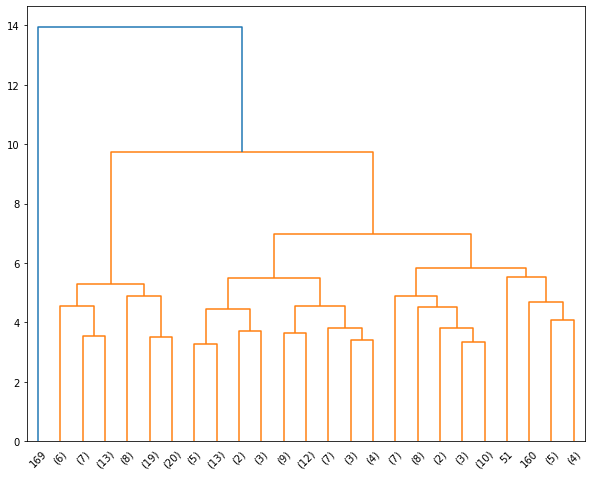

In [208]:
#use truncate_mode='lastp' to select last p formed clusters
plt.figure(figsize=(10,8))
Z = linkage(subset_scaled_df2, 'complete', metric='euclidean')

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25 # show only the last p merged clusters
)
plt.show()

In [209]:
max_d=5
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

In [210]:
set(clusters) 

{1, 2, 3, 4, 5, 6, 7, 8}

In [211]:
dataset2=subset_scaled_df2[:]  

In [216]:
dataset2['HierarchicalClusteringLabel']=clusters

<ipython-input-216-f9881820bb96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['HierarchicalClusteringLabel']=clusters


In [212]:
dataset2.head(3)

Property_Rights  Fiscal_Health  Business_Freedom  Labor_Freedom  \
0        -1.771283       1.057424         -1.053944       0.025371   
1         0.064576       0.448782          0.310799      -0.535102   
2        -1.145422      -1.565920         -0.212013      -0.738910   

   Monetary_Freedom  Trade_Freedom  Investment_Freedom_  Financial_Freedom  
0          0.107381      -0.835841            -2.276011          -2.101765  
1          0.614025       1.183693             0.534815           1.078456  
2         -0.082610      -0.706146            -1.339069          -1.041691

In [213]:
from sklearn.metrics import silhouette_score
silhouette_score(dataset.drop('KmeansLabel',axis=1),dataset['KmeansLabel'])

0.19043170387074412

In [217]:
from sklearn.metrics import silhouette_score
silhouette_score(dataset2.drop('HierarchicalClusteringLabel',axis=1),dataset2['HierarchicalClusteringLabel'])

0.16311743235141693

Optimum number of clusters should be 6.